## Python Pivot Tables
#### Tutorial by https://datagy.io/python-pivot-tables/

In [15]:
import pandas as pd
df = pd.read_excel('sample_pivot.xlsx', parse_dates=['Date'])

print(df.head())

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33


In [23]:
#default aggfunc is mean
#aggfunc='sum'
sales_by_region = pd.pivot_table(df, index= 'Region', values= 'Sales')

print(sales_by_region)

             Sales
Region            
East    408.182482
North   438.924051
South   432.956204
West    452.029412


In [24]:
sales_by_type = pd.pivot_table(df, index = 'Type', values = 'Sales')
print(sales_by_type)

                          Sales
Type                           
Children's Clothing  427.743860
Men's Clothing       444.257732
Women's Clothing     415.254717


In [25]:
sales_by_region.reset_index()



,Region,Sales
0,East,408.182482
1,North,438.924051
2,South,432.956204
3,West,452.029412


In [33]:
avg_region_price = pd.pivot_table(df, index = 'Region', values='Sales')
avg_region_price.reset_index()

,Region,Sales
0,East,408.182482
1,North,438.924051
2,South,432.956204
3,West,452.029412


In [35]:
#Filter by sales > 450 or < 430
avg_region_price[(avg_region_price['Sales']> 450) | (avg_region_price['Sales'] < 430)]

,Sales
Region,
East,408.182482
West,452.029412


### Creating a Multi-Index Pivot Table

In [39]:
multi_index = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = 'sum')
print(multi_index)

multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = ['sum', len])
print(multi_functions)

                            Sales
Region Type                      
East   Children's Clothing  45849
       Men's Clothing       51685
       Women's Clothing     70229
North  Children's Clothing  37306
       Men's Clothing       39975
       Women's Clothing     61419
South  Children's Clothing  18570
       Men's Clothing       18542
       Women's Clothing     22203
West   Children's Clothing  20182
       Men's Clothing       19077
       Women's Clothing     22217
                              sum   len
                            Sales Sales
Region Type                            
East   Children's Clothing  45849   113
       Men's Clothing       51685   122
       Women's Clothing     70229   176
North  Children's Clothing  37306    85
       Men's Clothing       39975    89
       Women's Clothing     61419   142
South  Children's Clothing  18570    45
       Men's Clothing       18542    39
       Women's Clothing     22203    53
West   Children's Clothing  20182    42
    

### Adding Columns to a Pandas Pivot Table

In [41]:
columns_example = pd.pivot_table(df, index = 'Type', columns = 'Region', values ='Units', aggfunc = 'sum')

print(columns_example)

Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0


### Plotting Pandas Pivot Tables

<AxesSubplot:xlabel='Type'>

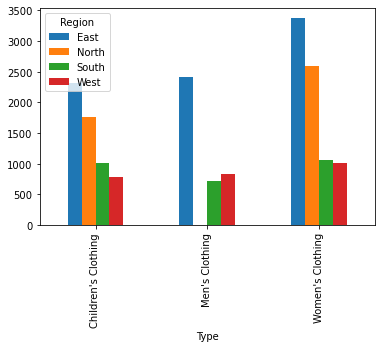

In [42]:
columns_example.plot(kind='bar')

### Handling Missing Data in Python Pivot Tables

In [46]:
print(df.info())

pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', aggfunc = 'max')
#Remove NaN values with fill_value
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', aggfunc = 'max', fill_value = 'N/A')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB
None


Region,East,North,South,West
Type,,,,
Children's Clothing,35.0,35.0,35.0,34.0
Men's Clothing,35.0,N/A,34.0,35.0
Women's Clothing,35.0,35.0,35.0,33.0


### Adding Totals for Rows and Columns to Pandas Pivot Tables

In [47]:
pd.pivot_table(df, index= 'Type', values= 'Units', columns='Region', aggfunc='max', fill_value='N/A', margins=True, margins_name='Total')

Region,East,North,South,West,Total
Type,,,,,
Children's Clothing,35.0,35.0,35.0,34.0,35.0
Men's Clothing,35.0,N/A,34.0,35.0,35.0
Women's Clothing,35.0,35.0,35.0,33.0,35.0
Total,35.0,35.0,35.0,35.0,35.0
